In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import evillens as evil


In [91]:
lens = evil.AnalyticSIELens(0.4,3.2)
lens.setup_grid(NX=3200,NY=3200,pixscale=0.00125,n=1)
lens.build_kappa_map(sigma=235.0,q=0.84,centroid=[0.007,0.0031], rotation=3*np.pi/5.0)
lens.deflect()

In [92]:
lens.source = evil.Source(3.2)
lens.source.setup_grid(NX=3200,NY=3200,pixscale=0.0002)

center_position = [0.045,-0.1]
rms_position = 0.02
rms_intensity = 0.1
rms_size = 0.5
average_size = -2.75

datalist = []

for i in range(50):
    r = abs(np.random.normal(0,rms_position))
    theta = 2*np.pi*np.random.random()
    x = center_position[0]+r*np.cos(theta)
    y = center_position[1]+r*np.sin(theta)
    I0 = np.random.normal(1.0,rms_intensity)
    R = 10.0**np.random.normal(average_size,rms_size)
    
    if i ==0:    
        lens.source.intensity = I0*np.exp(-0.5*(np.sqrt((lens.source.beta_x-x)**2+(lens.source.beta_y-y)**2)/R)**2)
    else:
        lens.source.intensity += I0*np.exp(-0.5*(np.sqrt((lens.source.beta_x-x)**2+(lens.source.beta_y-y)**2)/R)**2)
        print(x,y,I0,R)
    datalist.append([x,y,I0,R])
    


(0.049321172016538656, -0.093827646885581859, 1.1428544674652004, 0.00018226021159944533)
(0.038982633954905963, -0.118583802641793, 0.9878003634128032, 0.009895904985290265)
(0.038351823547481165, -0.09184990204442961, 0.9462452360208546, 0.00022810058113115013)
(0.048163874020721337, -0.097781956272678758, 0.9235265419505315, 0.002312457003459526)
(0.069493268192391738, -0.074854616719925035, 0.9445217695475958, 0.0004421239153346828)
(0.021157980938418194, -0.077105186570058729, 1.0229842141892238, 0.0007367711614616374)
(0.040714200817679097, -0.072075081693469684, 0.9964222611505588, 0.005105613187876862)
(0.046939264195334791, -0.10139789027175808, 1.064502608373922, 0.0006974374571681809)
(0.030667737306311144, -0.084017454406189102, 0.9806377572923648, 0.000959262982475259)
(0.033295220709487879, -0.096676181716035633, 1.0718329265883992, 0.0015258141508280117)
(0.05062284345101023, -0.086348725790321615, 1.3368482737925638, 0.0159109460636886)
(0.038249029846344734, -0.0974623

(-0.3, 0.3)

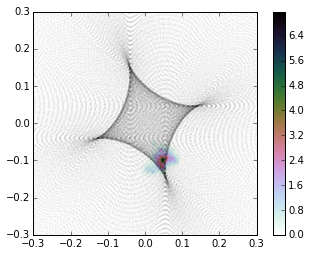

In [93]:
lens.raytrace()
plt.imshow(lens.source.intensity, origin='lower', extent = (np.min(lens.source.beta_x),np.max(lens.source.beta_x),np.min(lens.source.beta_y),np.max(lens.source.beta_y)), cmap='cubehelix_r' )
plt.colorbar()
plt.scatter(lens.beta_x[::10,::10],lens.beta_y[::10,::10],s=0.001)
plt.xlim(-0.3,0.3)
plt.ylim(-0.3,0.3)

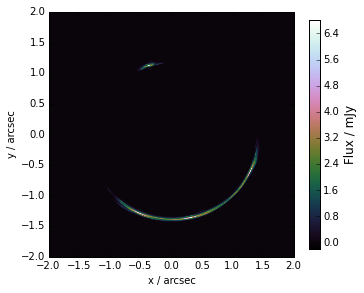

In [94]:
lens.plot('lensed image')

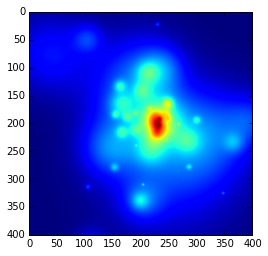

In [95]:
plt.imshow(lens.source.intensity[900:1300,1600:2000])

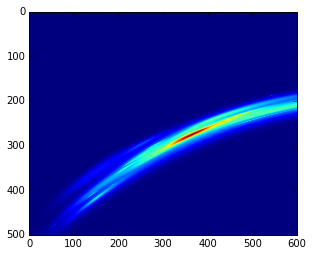

In [96]:
plt.imshow(lens.image[300:800,800:1400])

In [ ]:
lens.write_image_to('DrEvil.fits')
np.savetxt('DrEvil_source_parameters.txt', datalist)